## DL 4 Question 2:
 Predict the first 4 imagesof the test datausing the above model. Then, compare withthe actual label for those 4 images to check whether or not the model has predicted correctly.

In [28]:
# Importing the Libraries
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [15]:
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [16]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 212s 135ms/step - loss: 1.9715 - accuracy: 0.2687 - val_loss: 1.7703 - val_accuracy: 0.3586
Epoch 2/25
1563/1563 [==============================] - 220s 141ms/step - loss: 1.4947 - accuracy: 0.4548 - val_loss: 1.3773 - val_accuracy: 0.4889
Epoch 3/25
1563/1563 [==============================] - 196s 125ms/step - loss: 1.2969 - accuracy: 0.5290 - val_loss: 1.1744 - val_accuracy: 0.5728
Epoch 4/25
1563/1563 [==============================] - 203s 130ms/step - loss: 1.1540 - accuracy: 0.5852 - val_loss: 1.0807 - val_accuracy: 0.6080
Epoch 5/25
1563/1563 [==============================] - 224s 143ms/step - loss: 1.0319 - accuracy: 0.6330 - val_loss: 0.9843 - val_accuracy: 0.6476
Epoch 6/25
1563/1563 [==============================] - 196s 125ms/step - loss: 0.9393 - accuracy: 0.6653 - val_loss: 0.9089 - val_accuracy: 0.6780
Epoch 7/25
1563/1563 [==============================] - 204s 130ms/step - loss: 0.8744 - accuracy: 0.6882 - val_

In [23]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.10%


## Predecting the first four Images

In [53]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [54]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [55]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

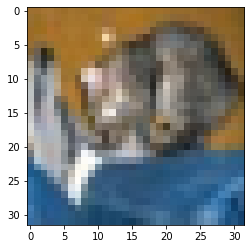

Actual label    :  [3]
Predicted label :  [3]


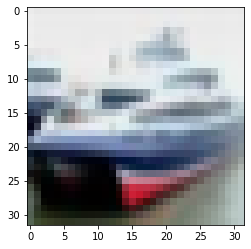

Actual label    :  [8]
Predicted label :  [8]


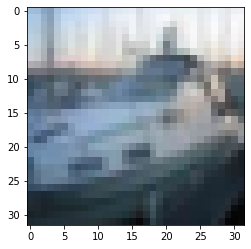

Actual label    :  [8]
Predicted label :  [8]


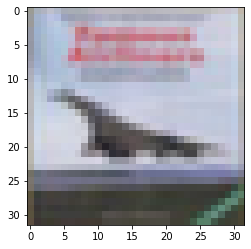

Actual label    :  [0]
Predicted label :  [0]


In [57]:
# Predict function will predict the number of images as per the request by user
def predict(x):
    for i in range(x):
        image = X_test[i] #assigning images to image
        plt.imshow(image)
        plt.show() #displaying the image
        print('Actual label    : ', y_test[i])
        print('Predicted label : ' , model.predict_classes(image.reshape(1, 32, 32, 3)))
        i = i + 1 #iterating for exit when it reaches max

predict(4) #predicting first four images

## Observations :
Our model predected all the labels correctly.